In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
nltk.download('punkt')
stop=set(stopwords.words('english')) # For checking if word in English vocabulary
special = string.punctuation # For checking punctuation
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Duy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Duy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
game_train = pd.read_csv('./Game/Datasets/EnOnly_simplified_steam_reviews.csv')
rest_train = pd.read_csv('./Restaurant/Datasets/yelp_review_polarity_csv/fixed_train.csv')

In [3]:
def create_corpus(dataset, target): # Split tweets into token for counting
    corpus=[]
    for x in dataset[dataset['target']==target]['review'].str.split():
        for i in x:
            corpus.append(i)
    print(corpus)
    return corpus

Text(0.5, 1.0, 'Recommended')

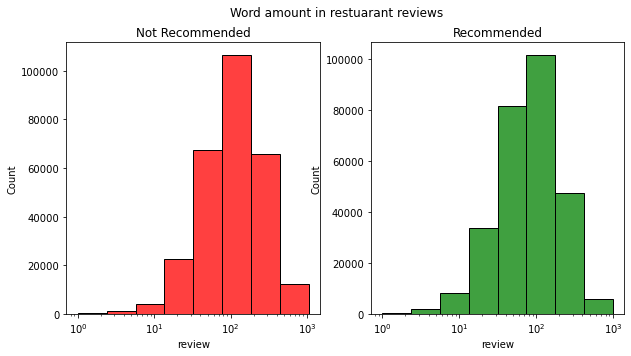

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Word amount in restuarant reviews')

rest_len=rest_train[rest_train['target']==0]['review'].str.split().map(lambda x: len(x))
sns.histplot(rest_len, bins=8, ax=ax1, color='red', log_scale = True)
ax1.set_title('Not Recommended')

rest_len=rest_train[rest_train['target']==1]['review'].str.split().map(lambda x: len(x))
sns.histplot(rest_len, bins=8, ax=ax2, color='green', log_scale = True)
ax2.set_title('Recommended')

In [25]:
plt.figure(figsize=(10,5))
fig.suptitle('Punctuation Count')
corpus_0=create_corpus(rest_train,0)
corpus_1=create_corpus(rest_train,1)
dic_0=defaultdict(int)
dic_1=defaultdict(int)

for i in (corpus_0):
    if i in special:
        dic_0[i]+=1
for i in (corpus_1):
    if i in special:
        dic_1[i]+=1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Not Recommended')

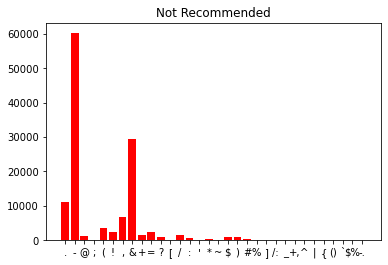

In [30]:
x0,y0=zip(*dic_0.items())
plt.bar(x0,y0,color='red')
plt.title('Not Recommended')

Text(0.5, 1.0, 'Recommended')

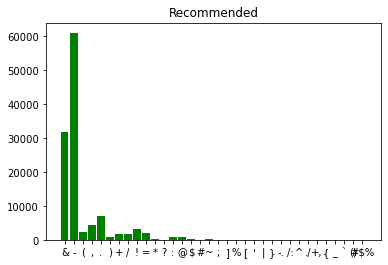

In [31]:
x1,y1=zip(*dic_1.items())
plt.bar(x1,y1,color='green')
plt.title('Recommended')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, 'Not Recommended')

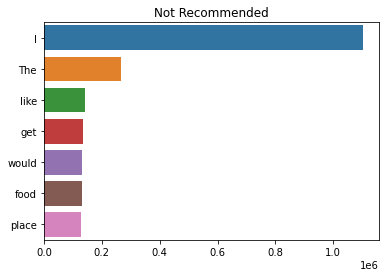

In [33]:
corpus=create_corpus(rest_train,0)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.title('Not Recommended')

<AxesSubplot:>

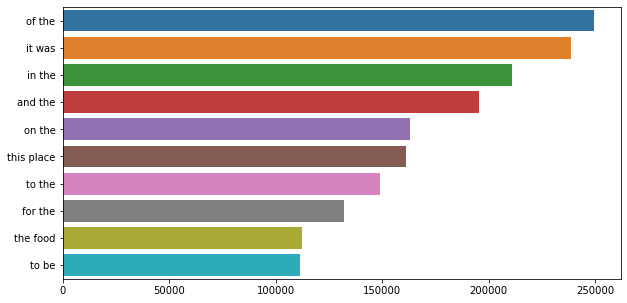

In [36]:
def get_top_tweet_bigrams(corpus, n=None): # For analyzing ngram
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(rest_train['review'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Recommended')

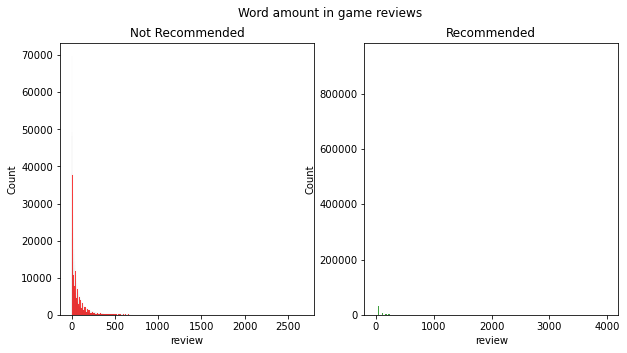

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Word amount in game reviews')

game_len=game_train[game_train['target']==0]['review'].str.split().map(lambda x: len(x))
sns.histplot(game_len, ax=ax1, color='red')
ax1.set_title('Not Recommended')

game_len=game_train[game_train['target']==1]['review'].str.split().map(lambda x: len(x))
sns.histplot(game_len, ax=ax2, color='green')
ax2.set_title('Recommended')